## Student Performance Indicator

Life cycle of Machine learning Project
Understanding the Problem Statement
Data Collection
Data Checks to perform
Exploratory data analysis
Data Pre-Processing
Model Training
Choose best model

# 1)Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

# 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

# 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/stud.csv')

In [5]:
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
192,female,group B,some high school,standard,none,62,64,66
134,male,group D,bachelor's degree,free/reduced,completed,74,79,75
445,female,group C,some high school,standard,completed,67,74,77
374,female,group D,bachelor's degree,standard,none,59,70,73
501,female,group B,associate's degree,standard,completed,94,87,92


In [6]:
df.shape

(1000, 8)

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
print("Gender:",df['gender'].unique())
print("Race_ethnicity:",df['race_ethnicity'].unique())
print("Parental_level_of_education:",df['parental_level_of_education'].unique())
print("Lunch:",df['lunch'].unique())
print("Test_preparation_course:",df['test_preparation_course'].unique())

Gender: ['female' 'male']
Race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Lunch: ['standard' 'free/reduced']
Test_preparation_course: ['none' 'completed']


In [13]:
numerical_column=[]
categorical_column=[]

for col in df.columns:
    if df[col].dtype == 'int64':
        numerical_column.append(col)
    else:
        categorical_column.append(col)

print('numerical_column:',numerical_column)
print('numerical_column:',categorical_column)

numerical_column: ['math_score', 'reading_score', 'writing_score']
numerical_column: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df['Total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average']=df['Total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
fullmarks_math = df[df['math_score'] == 100]['Average'].count()
fullmarks_reading = df[df['reading_score'] == 100]['Average'].count()
fullmarks_writing = df[df['writing_score'] == 100]['Average'].count()

print(f'No of students with full marks in Maths: {fullmarks_math}')
print(f'No of students with full marks in reading: {fullmarks_reading}')
print(f'No of students with full marks in writting: {fullmarks_writing}')

No of students with full marks in Maths: 7
No of students with full marks in reading: 17
No of students with full marks in writting: 14


In [16]:
fullmarks_math = df[df['math_score'] <= 20]['Average'].count()
fullmarks_reading = df[df['reading_score'] <= 20]['Average'].count()
fullmarks_writing = df[df['writing_score'] <= 20]['Average'].count()

print(f'No of students with less than 20 marks in Maths: {fullmarks_math}')
print(f'No of students with less than 20 marks in reading: {fullmarks_reading}')
print(f'No of students with less than 20 marks in writting: {fullmarks_writing}')

No of students with less than 20 marks in Maths: 4
No of students with less than 20 marks in reading: 1
No of students with less than 20 marks in writting: 3


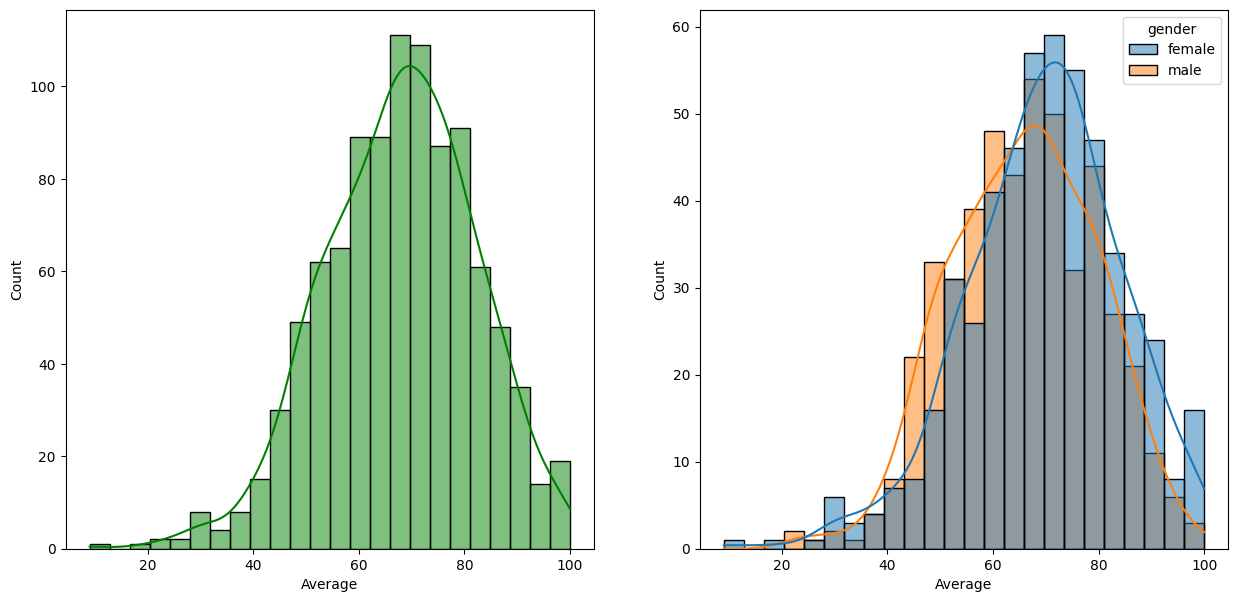

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average',kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average',kde=True, hue='gender')
plt.show()

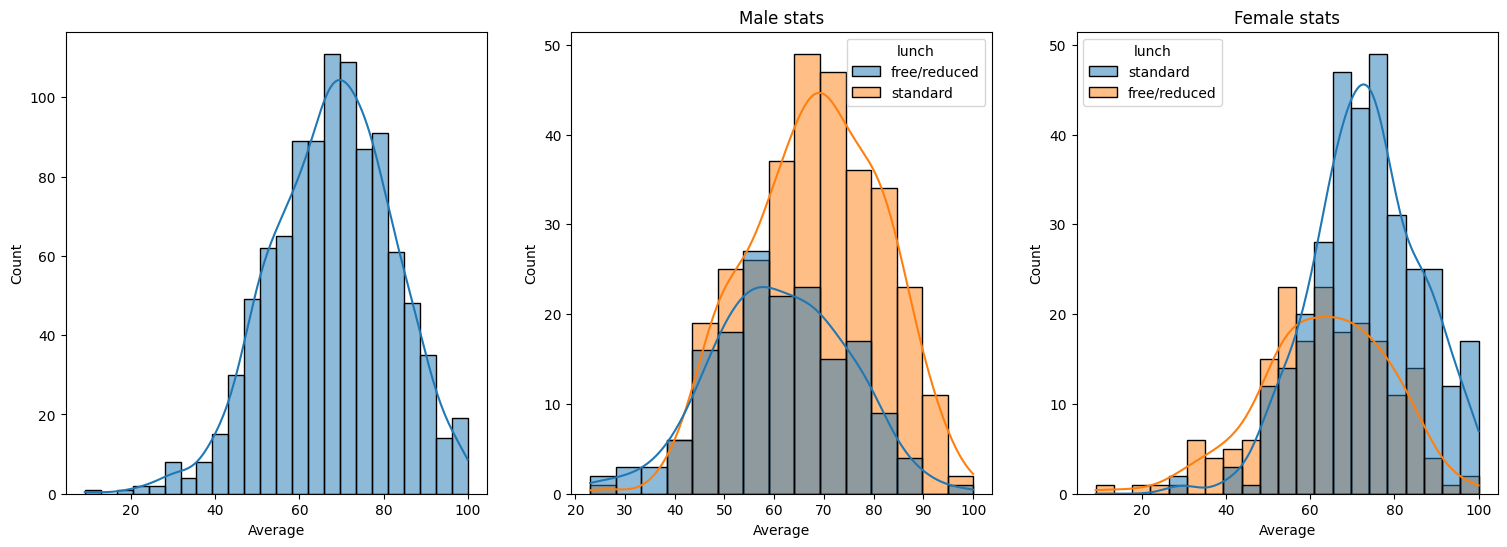

In [18]:
plt.subplots(1,2, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True)
plt.subplot(142)
plt.title('Male stats')
sns.histplot(data=df[df.gender=='male'], x='Average', kde=True, hue='lunch')
plt.subplot(143)
plt.title('Female stats')
sns.histplot(data=df[df.gender=='female'],x='Average', kde=True, hue='lunch')
plt.show()

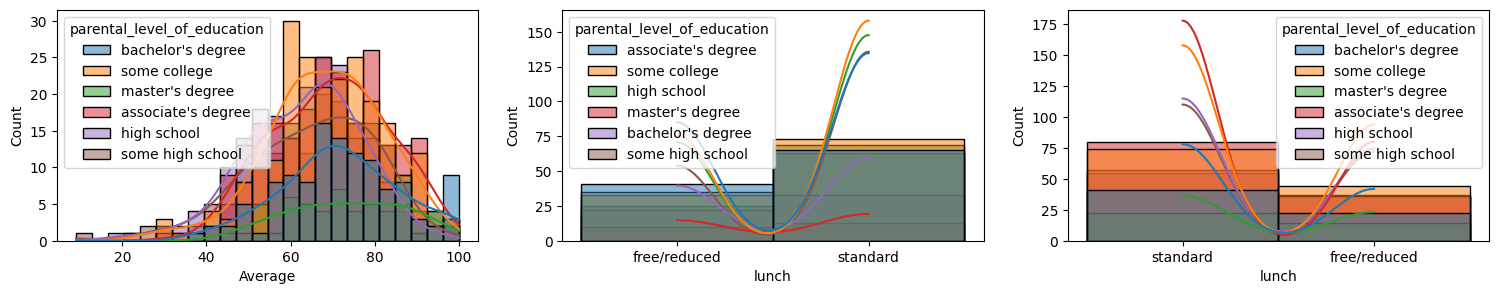

In [19]:
plt.subplots(1,3, figsize=(25,3))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='lunch', kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='lunch', kde=True, hue='parental_level_of_education')
plt.show()

<Axes: title={'center': 'writting Score'}, ylabel='writing_score'>

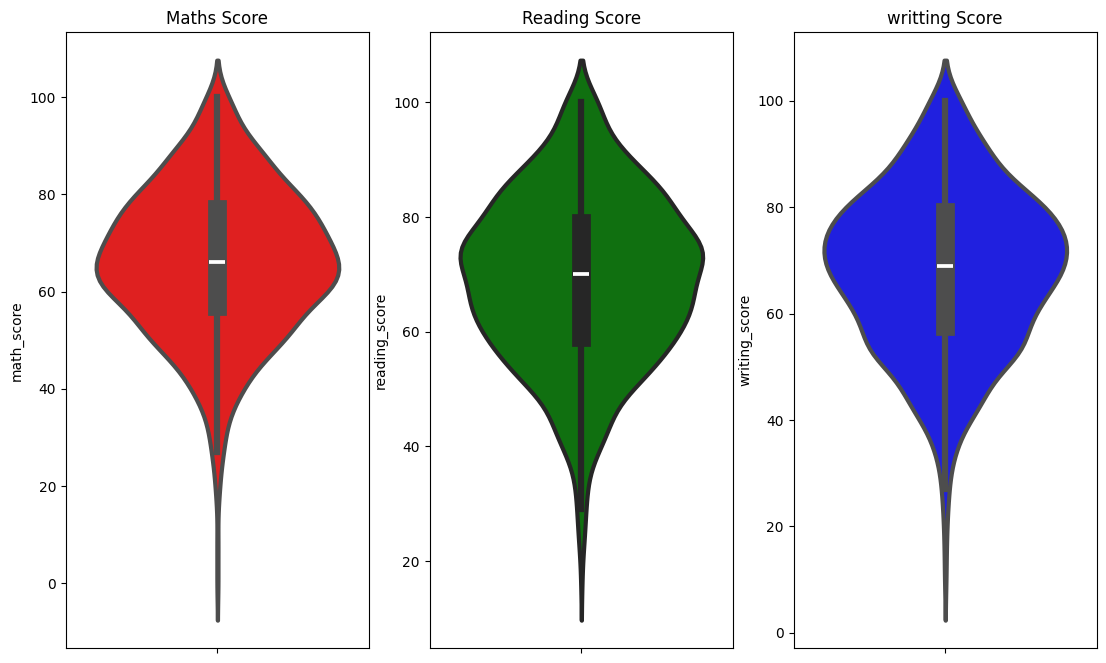

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Maths Score')
sns.violinplot(y='math_score' ,data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title("writting Score")
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)